In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.integrate as sci #integration toolbox

In [2]:
#equations of motion for flat earth surface
#F= m*a = m*zdd where z = altitute of surface, zd = velocity and zdd = acceleration
mass = 640/1000 #in kg
#second order differential equation 
def Derivatives(state, t):
    global mass
    z = state[0] #1st row of state vector
    velz = state[1] #2nd row of state vector

    #kinematics equations
    zd = velz #derivative of position is velocity
    #computing total forces
    grav = -9.81*mass #minus because the motion(z) is upwards and gravity is acting downwards
    aero = 0 #aerodynamics
    thrust = 0
    Forces = grav + aero + thrust
    zdd = Forces/mass
    #compute statedot 
    stated = np.asarray([zd, zdd]) #[derivative of z, derivative of velz]

    return stated

In [9]:
#intial conditions
z0 = 0 #in meters
velz0 = 164 #in m/s
stateinitial = np.asarray([z0, velz0])
#time window
tout = np.linspace(0, 35, 1000) #(intial time, final time, no. of data points)

#Numerical integration call
stateout = sci.odeint(Derivatives, stateinitial, tout) #odeint is ordinary differential equation toolbox, stateintial is intial conditions
zout = stateout[:,0]
velzout = stateout[:,1]

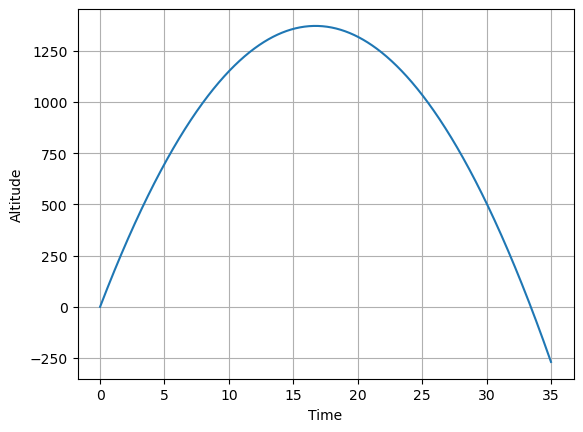

In [10]:
#plot for altitude
plt.plot(tout, zout)
plt.xlabel("Time")
plt.ylabel("Altitude")
plt.grid()

<Figure size 640x480 with 0 Axes>

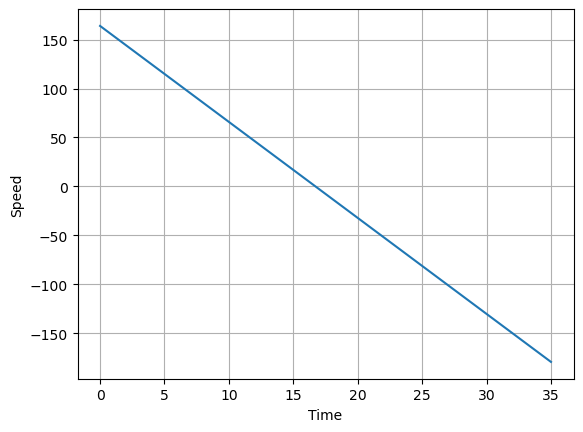

<Figure size 640x480 with 0 Axes>

In [11]:
#plot for velocity
plt.plot(tout, velzout)
plt.xlabel("Time")
plt.ylabel("Speed")
plt.grid()
plt.figure()

#both figures give projectile flat earth model